# Description

## Neural Network developed by Jai Pise



Physiological signal classification: classification of normal and abnormal heartbeats using Electrocardiogram (ECG) signals.  

**Why / Problem?**
Arrhythmias cause millions of deaths annually worldwide. Arrhythmia refers to abnormal irregular heartbeats that are detected through ECG signals.

**What / Task?**
Using the attached dataset, build a classifier that classifies heartbeats into three different classes: normal (N), supraventricular ectopic beat (S), and ventricular ectopic beat (V). The dataset consists of three classes of beats (labels): N (0), S (1), V(2). The last column represents the labels: 0,1,2, and the first 186 columns represent the beat.

**How / Procedure?**
What will you learn?
Real-world application of Deep Learning models for ECG signals.
Knowledge of python Libraries: NumPy, Matplotlib, Keras, and Pytorch



In [ ]:
# Imports


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

AttributeError: module 'keras.utils.generic_utils' has no attribute 'populate_dict_with_module_objects'

# Extract data

In [6]:
# training dataset
train_dataset = np.load('./Heartbeat/train.npy')

# testing dataset
test_dataset = np.load('./Heartbeat/test.npy')


In [7]:
# information of the dataset:

train_num_rows, train_num_cols = train_dataset.shape
test_num_rows, test_num_cols = test_dataset.shape

NUMBER_OF_BEATS = train_num_cols - 1
NUMBER_OF_TRAINING_EXAMPLES = train_num_rows
NUMBER_OF_TEST_EXAMPLES = test_num_rows


# print(NUMBER_OF_BEATS, NUMBER_OF_TRAINING_EXAMPLES)
print("shape (#rows by #columns):", train_dataset.shape)
# print(train_dataset[130000])

shape (#rows by #columns): (204775, 187)


## Train Data extraction

In [8]:
# Extract the beats:
train_beats = np.delete(train_dataset, train_num_cols-1, axis=1) # train_num_cols - 1 = number of data points for one beat
train_beats = train_beats.reshape(NUMBER_OF_TRAINING_EXAMPLES, NUMBER_OF_BEATS, 1)
# because axis = 1, a column is deleted


# Extract the labels:
train_labels = np.ravel(np.delete(train_dataset, slice(train_num_cols-1), axis=1))
# np.ravel to return flattened 1D array

## Test Data Extraction

In [10]:
# the test beats
test_beats = np.delete(test_dataset, test_num_cols-1, axis=1)
test_beats = test_beats.reshape(NUMBER_OF_TEST_EXAMPLES, NUMBER_OF_BEATS, 1)

# the test labels:
test_labels = np.ravel(np.delete(test_dataset, slice(test_num_cols-1), axis=1))


# Plot

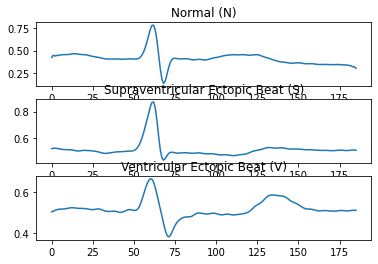

<Figure size 1440x720 with 0 Axes>

In [11]:
# Plot one beat from each class:

x_points = np.arange(train_num_cols-1)

# label: 0
y_points0 = train_beats[49604]

# label: 1
y_points1 = train_beats[50580]

# label: 2
y_points2 = train_beats[3785]


figure, axis = plt.subplots(3, 1)

# ax = plt.gca()
# ax.axes.xaxis.set_visible(False)
# ax.axes.yaxis.set_visible(False)


axis[0].plot(x_points, y_points0)
axis[0].set_title("Normal (N)")

axis[1].plot(x_points, y_points1)
axis[1].set_title("Supraventricular Ectopic Beat (S)")

axis[2].plot(x_points, y_points2)
axis[2].set_title("Ventricular Ectopic Beat (V)")

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.show()
# plt.savefig("test.jpg")
# files.download("test.jpg")

# Training the CNN

## Model layers

In [27]:
batch_size = 10
num_epochs = 20

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(64, 3, activation='relu', input_shape=(NUMBER_OF_BEATS, 1)),
  tf.keras.layers.MaxPooling1D(2),
  tf.keras.layers.Conv1D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling1D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])


In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 184, 64)           256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 92, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 90, 64)            12352     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 45, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2880)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                57620     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6

## Model Training

In [29]:
model.fit(train_beats, train_labels, epochs=num_epochs)

Epoch 1/20
6400/6400 [==============================] - 152s 24ms/step - loss: 0.2120 - accuracy: 0.9381
Epoch 2/20
6400/6400 [==============================] - 130s 20ms/step - loss: 0.1218 - accuracy: 0.9683
Epoch 3/20
1187/6400 [====>.........................] - ETA: 2:02 - loss: 0.1067 - accuracy: 0.9728

KeyboardInterrupt: 

In [24]:
model.evaluate(test_beats, test_labels)

6350/6350 [==============================] - 13s 2ms/step - loss: 0.4416 - accuracy: 0.8960


[0.4416077136993408, 0.895957887172699]